In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv("Fast Food Sales.csv")
data.head()

,order_id,date,item_name,item_type,item_price,quantity,transaction_amount,transaction_type,received_by,time_of_sale
0,1,07-03-2022,Aalopuri,Fastfood,20,13,260,NaN,Mr.,Night
1,2,8/23/2022,Vadapav,Fastfood,20,15,300,Cash,Mr.,Afternoon
2,3,11/20/2022,Vadapav,Fastfood,20,1,20,Cash,Mr.,Afternoon
3,4,02-03-2023,Sugarcane juice,Beverages,25,6,150,Online,Mr.,Night
4,5,10-02-2022,Sugarcane juice,Beverages,25,8,200,Online,Mr.,Evening


In [4]:
data.shape

(1000, 10)

In [5]:
# Count the number of null (NaN) values in each column
null_values = data.isnull().sum()
print(null_values)

order_id                0
date                    0
item_name               0
item_type               0
item_price              0
quantity                0
transaction_amount      0
transaction_type      107
received_by             0
time_of_sale            0
dtype: int64


## Data Cleaning

In [6]:
#Converting Date into datetime format
data['date'].replace('/', '-')
data['date']=pd.to_datetime(data['date'],format='mixed')


In [7]:
data['Month_Year'] = data['date'].dt.strftime('%Y-%m')


In [8]:
print(data['date'].min())
print(data['date'].max())

2022-04-01 00:00:00
2023-03-30 00:00:00


In [9]:
data['transaction_type'].value_counts()

transaction_type
Cash      476
Online    417
Name: count, dtype: int64

In [10]:
data.item_name.unique()

array(['Aalopuri', 'Vadapav', 'Sugarcane juice', 'Panipuri', 'Frankie',
       'Sandwich', 'Cold coffee'], dtype=object)

In [11]:
data.item_type.unique()

array(['Fastfood', 'Beverages'], dtype=object)

In [12]:
data.received_by.unique()

array(['Mr.', 'Mrs.'], dtype=object)

In [13]:
data.time_of_sale.unique()

array(['Night', 'Afternoon', 'Evening', 'Morning', 'Midnight'],
      dtype=object)

In [14]:
data['transaction_type'].value_counts()


transaction_type
Cash      476
Online    417
Name: count, dtype: int64

In [15]:
data['transaction_type'].value_counts(normalize=True)


transaction_type
Cash      0.533035
Online    0.466965
Name: proportion, dtype: float64

In [16]:
data['transaction_type'].fillna(method='bfill', inplace=True)
data

C:\Users\REENA LONARE\AppData\Local\Temp\ipykernel_7724\1403806024.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['transaction_type'].fillna(method='bfill', inplace=True)
C:\Users\REENA LONARE\AppData\Local\Temp\ipykernel_7724\1403806024.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data['transaction_type'].fillna(method='bfill', inplace=True)


,order_id,date,item_name,item_type,item_price,quantity,transaction_amount,transaction_type,received_by,time_of_sale,Month_Year
0,1,2022-07-03,Aalopuri,Fastfood,20,13,260,Cash,Mr.,Night,2022-07
1,2,2022-08-23,Vadapav,Fastfood,20,15,300,Cash,Mr.,Afternoon,2022-08
2,3,2022-11-20,Vadapav,Fastfood,20,1,20,Cash,Mr.,Afternoon,2022-11
3,4,2023-02-03,Sugarcane juice,Beverages,25,6,150,Online,Mr.,Night,2023-02
4,5,2022-10-02,Sugarcane juice,Beverages,25,8,200,Online,Mr.,Evening,2022-10
...,...,...,...,...,...,...,...,...,...,...,...
995,996,2023-03-19,Frankie,Fastfood,50,10,500,Online,Mrs.,Evening,2023-03
996,997,2022-09-20,Sandwich,Fastfood,60,7,420,Online,Mr.,Evening,2022-09
997,998,2023-01-26,Sandwich,Fastfood,60,13,780,Online,Mr.,Evening,2023-01
998,999,2022-08-27,Panipuri,Fastfood,20,5,100,Online,Mrs.,Afternoon,2022-08


In [17]:
# Create a new DataFrame with the cleaned data
data = data.copy()

# Save the cleaned data to a CSV file
data.to_csv("Cleaned_Fast_Food_Sales.csv", index=False)

## EDA

In [18]:
data['transaction_type'].value_counts(normalize=True)

transaction_type
Cash      0.527
Online    0.473
Name: proportion, dtype: float64

In [19]:
# Unique items in each Item type
data.groupby('item_type')['item_name'].unique()

item_type
Beverages                      [Sugarcane juice, Cold coffee]
Fastfood     [Aalopuri, Vadapav, Panipuri, Frankie, Sandwich]
Name: item_name, dtype: object

In [20]:
item_prices = data[['item_name', 'item_price']].drop_duplicates()
item_prices

,item_name,item_price
0,Aalopuri,20
1,Vadapav,20
3,Sugarcane juice,25
7,Panipuri,20
10,Frankie,50
15,Sandwich,60
19,Cold coffee,40


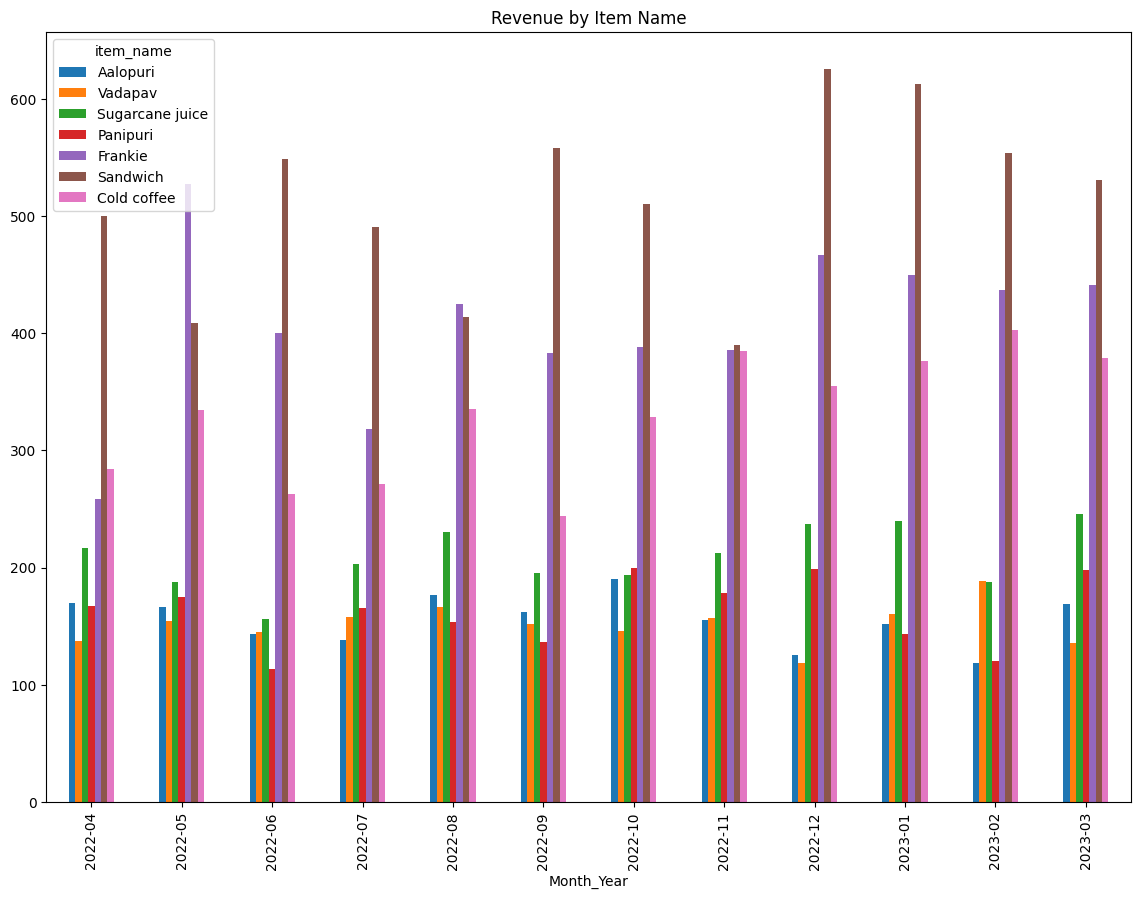

In [21]:
#Sales by month

pd.pivot_table(data,values='transaction_amount',index='Month_Year',columns='item_name').plot.bar(y=data['item_name'].unique(),
figsize=(14,10),title='Revenue by Item Name')

plt.show()

In [22]:
# Avg Sales of item_type throught the day

pd.pivot_table(data,values='quantity',index='item_type',columns='time_of_sale').round(2)

time_of_sale,Afternoon,Evening,Midnight,Morning,Night
item_type,,,,,
Beverages,8.83,8.35,8.15,8.65,7.97
Fastfood,8.09,7.35,7.83,8.13,8.87


In [23]:
# Avg Sales of item throught the day

pd.pivot_table(data,values='quantity',index='item_name',columns='time_of_sale').round(2)

time_of_sale,Afternoon,Evening,Midnight,Morning,Night
item_name,,,,,
Aalopuri,7.79,7.16,6.76,7.96,9.38
Cold coffee,9.91,7.83,7.81,8.97,7.67
Frankie,7.68,8.28,9.00,8.87,7.94
Panipuri,8.21,6.69,8.97,8.03,9.38
Sandwich,8.63,7.10,7.73,9.36,9.73
Sugarcane juice,7.93,8.84,8.46,8.24,8.41
Vadapav,8.43,7.65,7.12,6.72,7.96


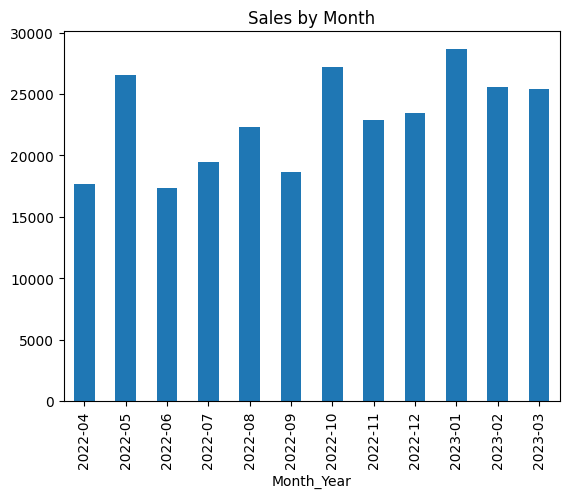

In [24]:
data.groupby('Month_Year')['transaction_amount'].sum().plot(kind='bar')
plt.title("Sales by Month")
plt.show()

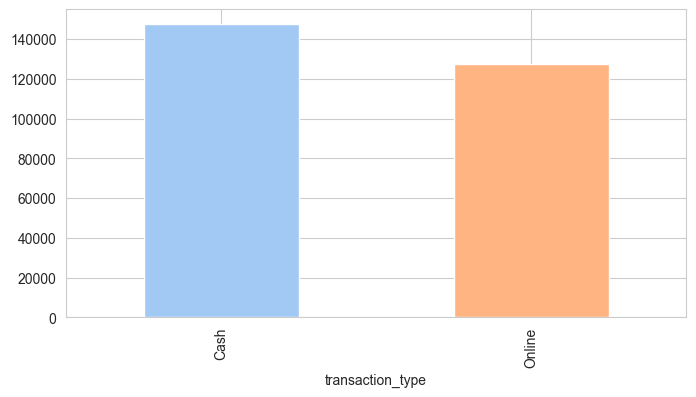

In [25]:
sns.set_style("whitegrid")
palette = sns.color_palette("pastel", n_colors=5)
data.groupby('transaction_type')['transaction_amount'].sum().plot(kind='bar', figsize=(8,4), color=palette)
plt.show()

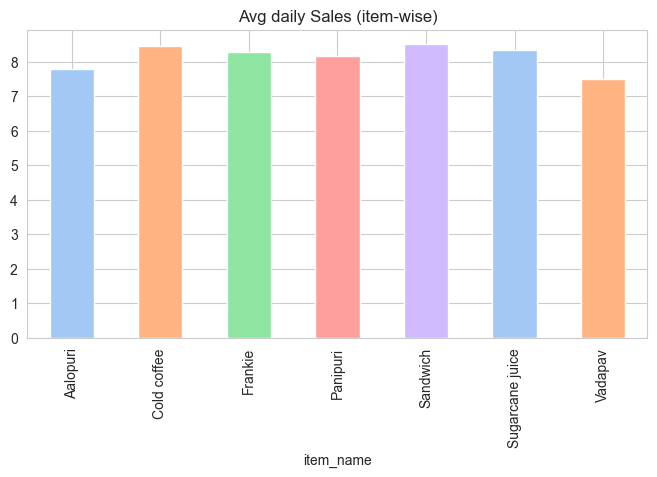

In [26]:
sns.set_style("whitegrid")
palette = sns.color_palette("pastel", n_colors=5)
data.groupby('item_name')['quantity'].mean().plot(kind='bar', figsize=(8,4), color=palette)
plt.title("Avg daily Sales (item-wise)")
plt.show()